In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

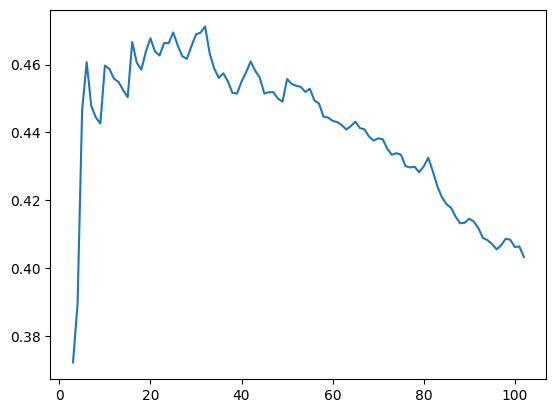

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],
diabetes['target'], random_state=42)
from sklearn.neighbors import KNeighborsRegressor
K_max = 100 # maximal number of nearest neighbours to consider
import numpy as np
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+3,results)

In [4]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.

    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of samples used i

In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
cross_val_score(knn, X_train, y_train)

array([0.28743721, 0.24283699, 0.32312734, 0.32108514, 0.12845082])

In [6]:
from sklearn.utils import shuffle
X, y = shuffle(diabetes.data, diabetes.target, random_state=42)
print(cross_val_score(knn, X, y))


[0.36498737 0.32300369 0.26748019 0.43230668 0.40572547]


In [7]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.37222167132521977

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
knn2.score(X_test, y_test)

0.009009009009009009

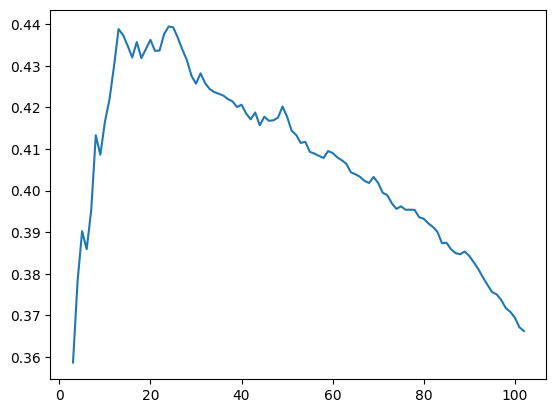

In [9]:
K_max = 100 # maximal number of nearest neighbours to consider
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max)+3,results)


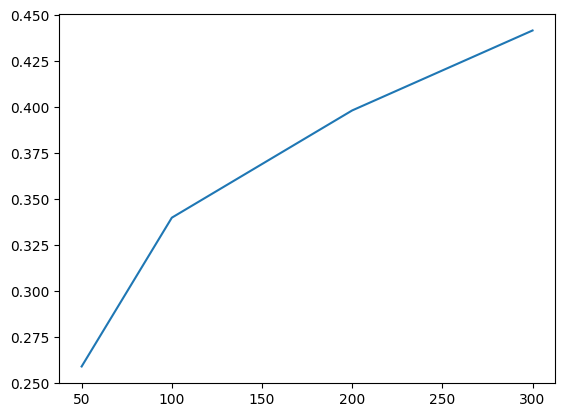

In [10]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50,100,200,300]) # sizes of training sets
# that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
        diabetes.target, train_size=train_sizes[k], random_state=42)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)

In [11]:
n = 99 # we are in the morning of the 100th day
L = 10**6 * np.random.random((n)) - 10**6/2
print(L)

[-333512.83536174  -77321.63148236 -116594.72423734   78905.70838017
 -159135.23056215  133276.66624841  295645.0159119   301682.91166844
  380771.71344722 -260424.08189992   28714.0736725   191818.79718918
 -278131.16843847  466297.58263091   84235.37290536 -437465.23882149
  469993.65655427  109701.58005574  415005.24011116 -269606.2378705
  -89090.02039525   11234.31329143   51630.63518482  429779.31054989
 -138541.57678799  274913.95697785 -434885.88404007  -47563.14511102
  -84493.76775916  143205.47109112  239341.09923282  415379.79687929
  242463.45398051 -277982.70876965    9603.54587526  136988.09648733
 -327563.70426067   89759.77772371  123476.18849368 -255834.58377258
  311826.80465585  -11785.95171255  388081.18126866 -303746.34642214
  -37484.34755624    3043.70404739 -309301.79004833  214499.03143712
  390807.06582809  463504.59321055 -290916.51419069 -128659.88167577
 -259343.64757205 -312407.78256938  218759.24307844 -165950.20720598
  -45119.87029568   75238.96264639 

In [12]:
sorted_L = np.sort(L)
VaR = sorted_L[-int(np.floor((n+1)/5))]
print(VaR)

295645.0159119016


In [13]:
np.floor(4.5)

4.0

In [14]:
import math
def VaR(L):
    """Value at Risk (a primitive conformal predictor)"""
    if L.size>=4:
        return np.sort(L)[-int(np.floor((n+1)/5))]
    else:
        return math.inf

In [15]:
N  = 500 # the number of days
# The losses on those days:
L = 10**6 * np.random.random_sample((N)) - 10**6/2

In [16]:
successes = np.empty(N)
for n in range(N):
    # This is what happens on the (n+1)st day:
    V = VaR(L[:n]) # VaR for the (n+1)st day
    if L[n]<=V:
        successes[n] = 1 # our VaR worked
    else:
        successes[n] = 0 # it didn't
print(np.mean(successes))


0.792


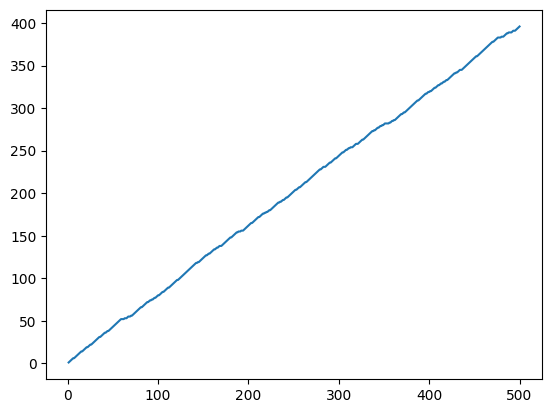

In [17]:
plt.plot(np.arange(N)+1,np.cumsum(successes))

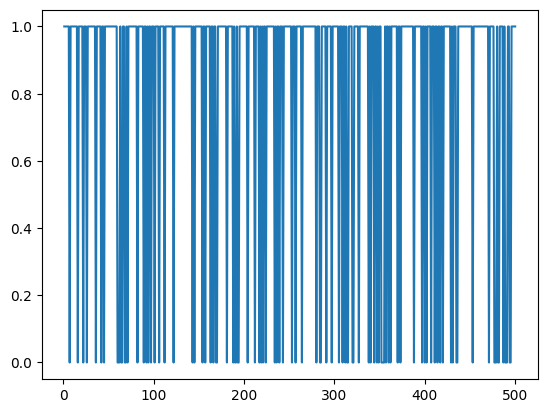

In [22]:
plt.plot(np.arange(N)+1,successes)

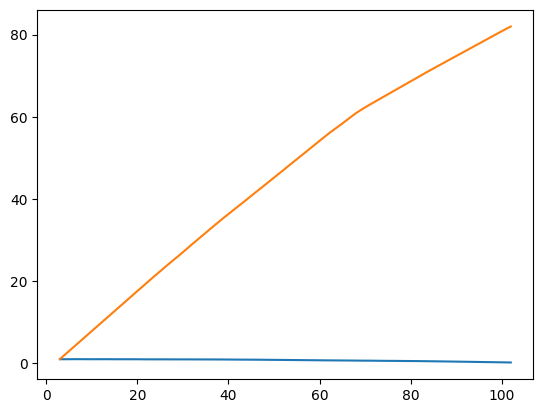

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
    iris['target'], random_state=0)
K_max = 100 # maximal number of nearest neighbours to consider
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+3)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)

r=np.empty(K_max)
for i in range(K_max):
    knn2 = KNeighborsClassifier(n_neighbors=i+3)
    knn2.fit(X_train, y_train)
    r[i]=(knn2.score(X_test, y_test))
%matplotlib inline
plt.plot(np.arange(K_max)+3,results)
plt.plot(np.arange(K_max)+3,np.cumsum(r))
